In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Car_Sales_Quebec.csv')
data.index = pd.to_datetime(data['Month'], format='%Y-%m')
del data['Month']

In [3]:
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


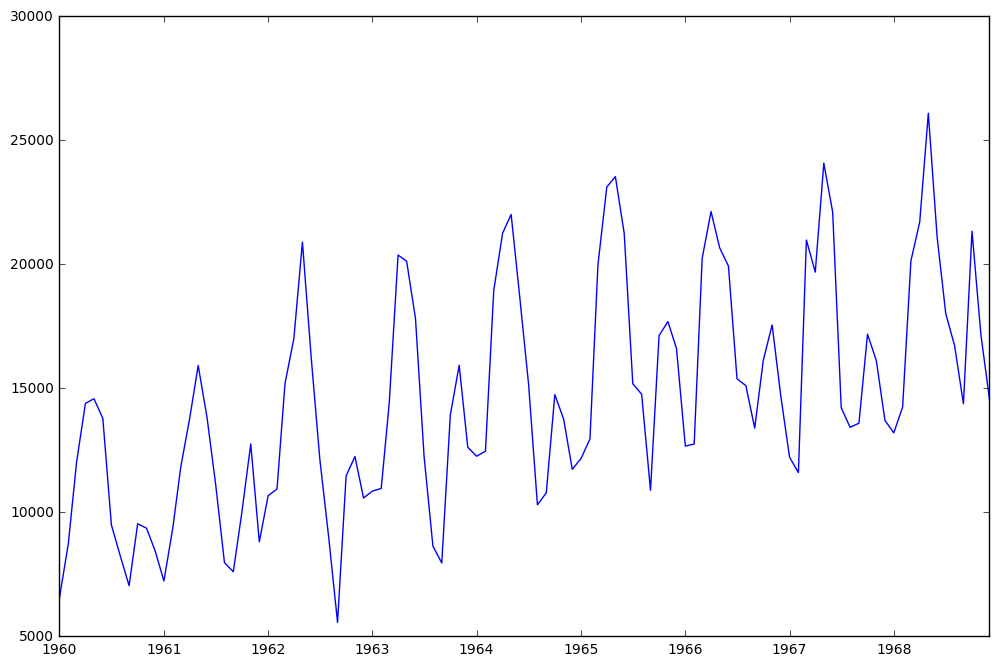

In [4]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data['Sales'])

In [5]:
model = pf.ARIMA(data=data, ar=12, ma=12, integ=1, target='Sales', family=pf.Normal())
x = model.fit('MLE') # Maximum Likelihood
x.summary()

Normal ARIMA(12,1,12)                                                                                     
======================================================= ==================================================
Dependent Variable: Differenced Sales                   Method: MLE                                       
Start Date: 1961-01-01 00:00:00                         Log Likelihood: -1296.5647                        
End Date: 1968-12-01 00:00:00                           AIC: 2645.1294                                    
Number of observations: 95                              BIC: 2711.5302                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 75.0202    59.5321    1.2602   0.2076   (-41.6626 | 191.7031)    
AR(1)                                

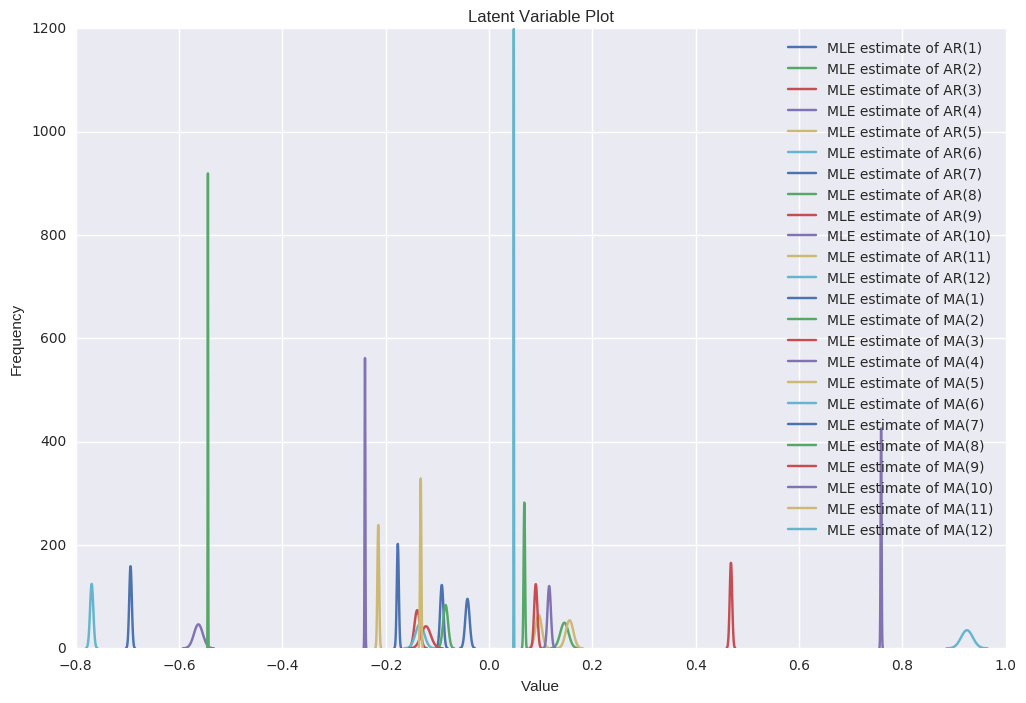

In [6]:
model.plot_z(range(1,25),figsize=(12,8)) # No constant as to large

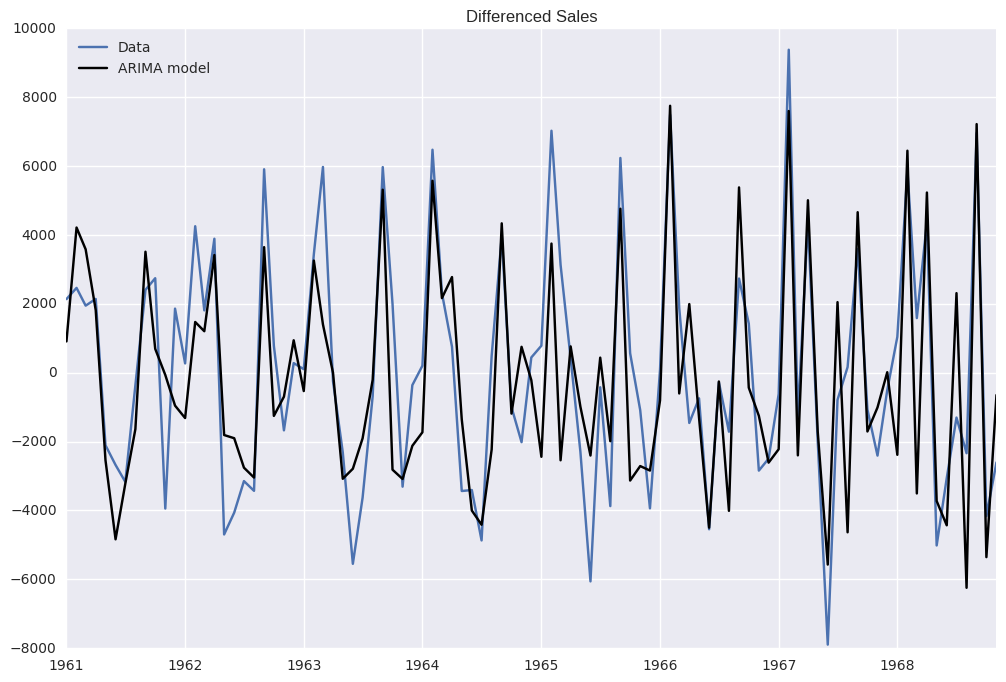

In [7]:
model.plot_fit(figsize=(12,8))

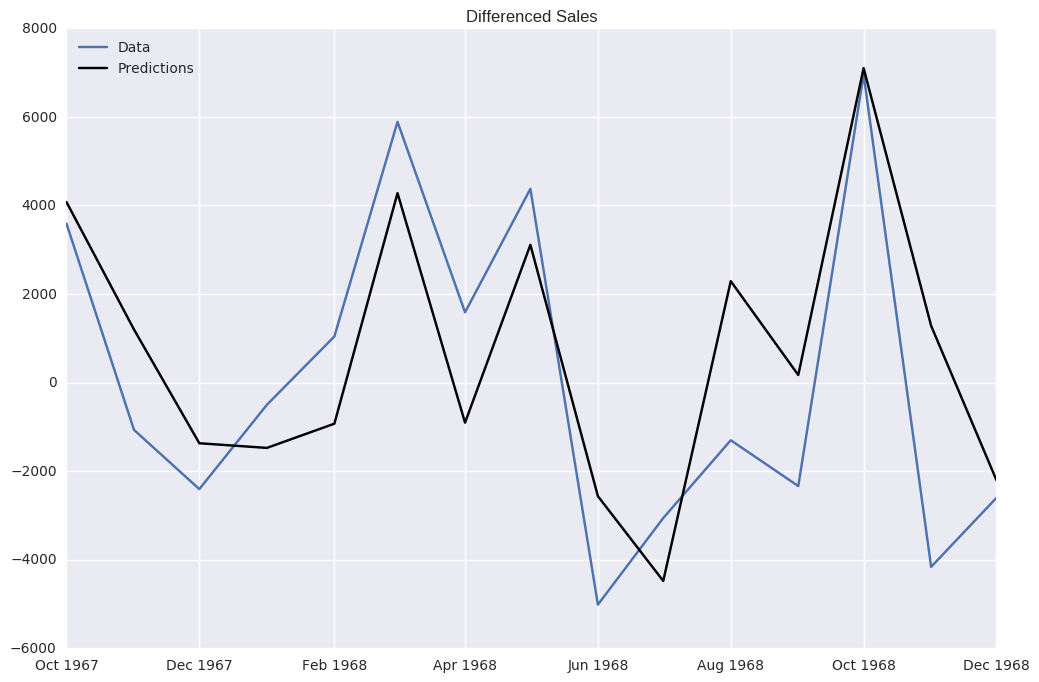

In [8]:
# Rolling
model.plot_predict_is(h=15, figsize=(12,8))